In [7]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
backend = Aer.get_backend('qasm_simulator')

# Regularized Feature Map

## Regularization

In [9]:
np.random.seed(42)

n = 200
n_features = 4
epochs = 100
x = np.random.uniform(0, np.pi, (n, n_features))

std = 0.2
y = np.sin(2*x[:,2])
y = scaler(y, a=0.1, b=0.9).reshape(-1, 1)

x_train, y_train = x[:100,:], y[:100,:]

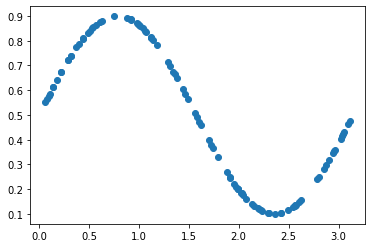

In [10]:
plt.plot(x_train[:,2], y_train,"o")
plt.show()

### No Penalty

In [ ]:
np.random.seed(42)
model_list = []
for i in tqdm(range(1)):
    optimizer = Adam(lr=0.1)
    model = RegularizedModel(n_features=n_features, 
                             n_targets=1, 
                             reps=2,
                             alpha=0.00,
                             backend=backend, 
                             shots=10000, 
                             optimizer=optimizer)
    
    model.train(x_train, y_train, epochs=epochs, verbose=True) 
    model_list.append(model)
    print(model.loss[-1])

saver(model_list, data_path("sparse_regularisation_model_no_penalty"))

### Low Penalty

In [11]:
np.random.seed(42)
model_list = []
for i in tqdm(range(10)):
    optimizer = Adam(lr=0.1)
    model = RegularizedModel(n_features=n_features, 
                             n_targets=1, 
                             reps=2,
                             alpha=0.001,
                             backend=backend, 
                             shots=10000, 
                             optimizer=optimizer)
    
    model.train(x_train, y_train, epochs=epochs, verbose=True) 
    model_list.append(model)
    print(model.loss[-1])

saver(model_list, data_path("sparse_regularisation_model_low_penalty"))

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.09175838411805637
epoch: 1, loss: 0.07669595281098665
epoch: 2, loss: 0.078531535230976
epoch: 3, loss: 0.08026899982365775
epoch: 4, loss: 0.0773016005952245
epoch: 5, loss: 0.07209445362370574
epoch: 6, loss: 0.0661735921570149
epoch: 7, loss: 0.06049803487812892
epoch: 8, loss: 0.05456455022008882
epoch: 9, loss: 0.048009008568964784
epoch: 10, loss: 0.04070023598692346
epoch: 11, loss: 0.03417031399145585
epoch: 12, loss: 0.029550109116788962
epoch: 13, loss: 0.02709130565056888
epoch: 14, loss: 0.026029941060663125
epoch: 15, loss: 0.026117636297436145
epoch: 16, loss: 0.026653022483655614
epoch: 17, loss: 0.02687908178472526
epoch: 18, loss: 0.02615012085067542
epoch: 19, loss: 0.024923861784554323
epoch: 20, loss: 0.022962255300449784
epoch: 21, loss: 0.020766743865657952
epoch: 22, loss: 0.018443861120012346
epoch: 23, loss: 0.015298693354712787
epoch: 24, loss: 0.012152515056488494
epoch: 25, loss: 0.009036991391639968
epoch: 26, loss: 0.0061042320073922
epoc

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.0780308127110017
epoch: 1, loss: 0.078011929927942
epoch: 2, loss: 0.07777388901395557
epoch: 3, loss: 0.07770753003546266
epoch: 4, loss: 0.07658549513375933
epoch: 5, loss: 0.07409029961503522
epoch: 6, loss: 0.07053211073077024
epoch: 7, loss: 0.06448063774814367
epoch: 8, loss: 0.056666994568639426
epoch: 9, loss: 0.04766831557641647
epoch: 10, loss: 0.0396002216154465
epoch: 11, loss: 0.033881856166828414
epoch: 12, loss: 0.03146123269449683
epoch: 13, loss: 0.029370350789312546
epoch: 14, loss: 0.02756129376988611
epoch: 15, loss: 0.025150878310087874
epoch: 16, loss: 0.022774646496514298
epoch: 17, loss: 0.020575439604655688
epoch: 18, loss: 0.01854911818916449
epoch: 19, loss: 0.016663569240900036
epoch: 20, loss: 0.015435197720092607
epoch: 21, loss: 0.015043570794100689
epoch: 22, loss: 0.014751757080910673
epoch: 23, loss: 0.01466543668850713
epoch: 24, loss: 0.013556949975564883
epoch: 25, loss: 0.011756429431587261
epoch: 26, loss: 0.010250998042209181
ep

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.0779188927681771
epoch: 1, loss: 0.07793664141668641
epoch: 2, loss: 0.07706481619439766
epoch: 3, loss: 0.0758273317558325
epoch: 4, loss: 0.07443936161265466
epoch: 5, loss: 0.0717027714865923
epoch: 6, loss: 0.06714739521462235
epoch: 7, loss: 0.06087452305431999
epoch: 8, loss: 0.053527301166134036
epoch: 9, loss: 0.04678244213405998
epoch: 10, loss: 0.04036303943187094
epoch: 11, loss: 0.033335757466534006
epoch: 12, loss: 0.028223096176569575
epoch: 13, loss: 0.025046459782114693
epoch: 14, loss: 0.023440756063151852
epoch: 15, loss: 0.02302396025848741
epoch: 16, loss: 0.02349067310913155
epoch: 17, loss: 0.023477006211713003
epoch: 18, loss: 0.023349556358420853
epoch: 19, loss: 0.023534338173776707
epoch: 20, loss: 0.023817786884406455
epoch: 21, loss: 0.023529259633385462
epoch: 22, loss: 0.022870764442909777
epoch: 23, loss: 0.02271145232348751
epoch: 24, loss: 0.02247218688661974
epoch: 25, loss: 0.022446141474941526
epoch: 26, loss: 0.02188861760540084
ep

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.08402602574406762
epoch: 1, loss: 0.07909943436855121
epoch: 2, loss: 0.07922072893902893
epoch: 3, loss: 0.07825052189096011
epoch: 4, loss: 0.07838790085953447
epoch: 5, loss: 0.07822923154748336
epoch: 6, loss: 0.07791606477975514
epoch: 7, loss: 0.07719741605058157
epoch: 8, loss: 0.07555660873115252
epoch: 9, loss: 0.07202115730204417
epoch: 10, loss: 0.06845725054510661
epoch: 11, loss: 0.06307194074315614
epoch: 12, loss: 0.057207196643706194
epoch: 13, loss: 0.049723527566213246
epoch: 14, loss: 0.04218445202235793
epoch: 15, loss: 0.03422412541056196
epoch: 16, loss: 0.028178686525837528
epoch: 17, loss: 0.02366992497886076
epoch: 18, loss: 0.020733073593541474
epoch: 19, loss: 0.018357184486286475
epoch: 20, loss: 0.015774483037165207
epoch: 21, loss: 0.01277737173914651
epoch: 22, loss: 0.010805757573380172
epoch: 23, loss: 0.009722813149218756
epoch: 24, loss: 0.00872640858611462
epoch: 25, loss: 0.007961991808786555
epoch: 26, loss: 0.006959229937161311
e

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.07965057765882654
epoch: 1, loss: 0.07916211511176828
epoch: 2, loss: 0.07922648795665528
epoch: 3, loss: 0.07814329359777611
epoch: 4, loss: 0.07826080216347577
epoch: 5, loss: 0.07839439765432571
epoch: 6, loss: 0.07861309637916088
epoch: 7, loss: 0.0776349012864245
epoch: 8, loss: 0.07693348677261636
epoch: 9, loss: 0.07505907892290692
epoch: 10, loss: 0.07059307366445129
epoch: 11, loss: 0.0638374855095767
epoch: 12, loss: 0.05503284919004714
epoch: 13, loss: 0.04499506586713345
epoch: 14, loss: 0.036827639290982817
epoch: 15, loss: 0.032005120135952254
epoch: 16, loss: 0.029005737166121343
epoch: 17, loss: 0.02689788386000041
epoch: 18, loss: 0.024409583593384614
epoch: 19, loss: 0.022696979677947707
epoch: 20, loss: 0.021605132674600534
epoch: 21, loss: 0.020862727001921478
epoch: 22, loss: 0.020010677779601464
epoch: 23, loss: 0.01993524832854506
epoch: 24, loss: 0.020188094611935825
epoch: 25, loss: 0.020646112095619222
epoch: 26, loss: 0.020777505586047487
ep

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.10164099323983367
epoch: 1, loss: 0.08098502895922605
epoch: 2, loss: 0.07823058953701983
epoch: 3, loss: 0.07862894629369227
epoch: 4, loss: 0.07792821249826341
epoch: 5, loss: 0.07592224749432916
epoch: 6, loss: 0.07417238949153097
epoch: 7, loss: 0.07149269116470293
epoch: 8, loss: 0.06752974845544912
epoch: 9, loss: 0.06304071940977198
epoch: 10, loss: 0.056635694047593256
epoch: 11, loss: 0.05028814454980576
epoch: 12, loss: 0.04454593691166382
epoch: 13, loss: 0.03855722671753347
epoch: 14, loss: 0.03308519835109327
epoch: 15, loss: 0.02805374726387284
epoch: 16, loss: 0.02446591579251939
epoch: 17, loss: 0.02244320625787473
epoch: 18, loss: 0.02202082383416956
epoch: 19, loss: 0.022142108140587046
epoch: 20, loss: 0.022663174017245775
epoch: 21, loss: 0.0224247659526626
epoch: 22, loss: 0.02141350031812659
epoch: 23, loss: 0.01979940209625359
epoch: 24, loss: 0.01737718446898847
epoch: 25, loss: 0.015290160580541676
epoch: 26, loss: 0.013323693060980836
epoch: 

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.07755790645966283
epoch: 1, loss: 0.07802661325984422
epoch: 2, loss: 0.0779639091873206
epoch: 3, loss: 0.07730930839261828
epoch: 4, loss: 0.07600666613252285
epoch: 5, loss: 0.07370317233188015
epoch: 6, loss: 0.07002075364560262
epoch: 7, loss: 0.06526878273657824
epoch: 8, loss: 0.05882318936897657
epoch: 9, loss: 0.05061748035678662
epoch: 10, loss: 0.04259687342594848
epoch: 11, loss: 0.03429835257381004
epoch: 12, loss: 0.028251010822739443
epoch: 13, loss: 0.024203299441081336
epoch: 14, loss: 0.022704360048088693
epoch: 15, loss: 0.022611283675558754
epoch: 16, loss: 0.022941238031170923
epoch: 17, loss: 0.02287272952441047
epoch: 18, loss: 0.023264404843491734
epoch: 19, loss: 0.023326933521638775
epoch: 20, loss: 0.02327694545396054
epoch: 21, loss: 0.023131826334515878
epoch: 22, loss: 0.022496265141626552
epoch: 23, loss: 0.02275036052469158
epoch: 24, loss: 0.0220664769387215
epoch: 25, loss: 0.02162225393052182
epoch: 26, loss: 0.020701279632502095
epo

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.11344701796159253
epoch: 1, loss: 0.0863923978159875
epoch: 2, loss: 0.07952905881911874
epoch: 3, loss: 0.08330395195324275
epoch: 4, loss: 0.08394665143664824
epoch: 5, loss: 0.08123893846354786
epoch: 6, loss: 0.07794589399808954
epoch: 7, loss: 0.07618652998728631
epoch: 8, loss: 0.07555860338884635
epoch: 9, loss: 0.07502128457128006
epoch: 10, loss: 0.07449216493549374
epoch: 11, loss: 0.07318347141727753
epoch: 12, loss: 0.07055398929857526
epoch: 13, loss: 0.06697347086920302
epoch: 14, loss: 0.0628996388139163
epoch: 15, loss: 0.05747285422390517
epoch: 16, loss: 0.052505706557399764
epoch: 17, loss: 0.04775430350920959
epoch: 18, loss: 0.043935455333319974
epoch: 19, loss: 0.04018559838807347
epoch: 20, loss: 0.03794710587560213
epoch: 21, loss: 0.03639712422733928
epoch: 22, loss: 0.03519494448439254
epoch: 23, loss: 0.03431843731098601
epoch: 24, loss: 0.03259211067529615
epoch: 25, loss: 0.03127294788897938
epoch: 26, loss: 0.029453237200929863
epoch: 27,

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.08104521434374792
epoch: 1, loss: 0.07732858085605832
epoch: 2, loss: 0.07709590248801812
epoch: 3, loss: 0.07713595729831133
epoch: 4, loss: 0.07476076051181696
epoch: 5, loss: 0.07129898948740584
epoch: 6, loss: 0.06614366890564606
epoch: 7, loss: 0.05927787591422654
epoch: 8, loss: 0.05233968008272103
epoch: 9, loss: 0.04578590670518395
epoch: 10, loss: 0.03942171695108212
epoch: 11, loss: 0.03598147452727891
epoch: 12, loss: 0.03304046582012215
epoch: 13, loss: 0.031058284588702655
epoch: 14, loss: 0.028589367036996792
epoch: 15, loss: 0.025543777761971878
epoch: 16, loss: 0.022404205109852412
epoch: 17, loss: 0.01896829938283499
epoch: 18, loss: 0.016321556745351944
epoch: 19, loss: 0.013813359302242936
epoch: 20, loss: 0.011150267967654934
epoch: 21, loss: 0.008229337274623834
epoch: 22, loss: 0.00534671880328618
epoch: 23, loss: 0.0031531708272423097
epoch: 24, loss: 0.001622586279690551
epoch: 25, loss: 0.0008054199031727401
epoch: 26, loss: 0.0004897634549517

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.07789288173795753
epoch: 1, loss: 0.07673277115450076
epoch: 2, loss: 0.07498976180059654
epoch: 3, loss: 0.0728283947635234
epoch: 4, loss: 0.06864075559937718
epoch: 5, loss: 0.06302646233489945
epoch: 6, loss: 0.05633065736478299
epoch: 7, loss: 0.048273757561093686
epoch: 8, loss: 0.04051103485465152
epoch: 9, loss: 0.03356496760105314
epoch: 10, loss: 0.027904870944886313
epoch: 11, loss: 0.024701295867954255
epoch: 12, loss: 0.02384120154825521
epoch: 13, loss: 0.023473062264353035
epoch: 14, loss: 0.02236218030694634
epoch: 15, loss: 0.019965812742043693
epoch: 16, loss: 0.016875579266324395
epoch: 17, loss: 0.013226895692255774
epoch: 18, loss: 0.009686880278608928
epoch: 19, loss: 0.006448906212703608
epoch: 20, loss: 0.003800091793250405
epoch: 21, loss: 0.0022661676283666694
epoch: 22, loss: 0.0019600883451077107
epoch: 23, loss: 0.0018843434969950026
epoch: 24, loss: 0.0016376793179338532
epoch: 25, loss: 0.0013470035309464837
epoch: 26, loss: 0.0010012688

### High Penalty

In [ ]:
np.random.seed(42)
model_list = []
for i in tqdm(range(10)):
    optimizer = Adam(lr=0.1)
    model = RegularizedModel(n_features=n_features, 
                             n_targets=1, 
                             reps=2,
                             alpha=0.01,
                             backend=backend, 
                             shots=10000, 
                             optimizer=optimizer)
    
    model.train(x_train, y_train, epochs=epochs) 
    model_list.append(model)
    print(model.loss[-1])

saver(model_list, data_path("sparse_regularisation_model_high_penalty"))

### No-Train Model

In [5]:
np.random.seed(42)
model_list = []
for i in tqdm(range(1)):
    optimizer = Adam(lr=0.1)
    model = RegularizedModel(n_features=n_features, 
                             n_targets=1, 
                             reps=3,
                             alpha=0,
                             train_map=False,
                             backend=backend, 
                             shots=10000, 
                             optimizer=optimizer)
    
    model.train(x_train, y_train, epochs=epochs, verbose=True) 
    model_list.append(model)
    print(model.loss[-1])

saver(model_list, data_path("sparse_no_train_model"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.09559016166388344
epoch: 1, loss: 0.07763653804795972
epoch: 2, loss: 0.06629940140997256
epoch: 3, loss: 0.06203183274140439
epoch: 4, loss: 0.05990754040036295
epoch: 5, loss: 0.05719841942748674
epoch: 6, loss: 0.05407732645957505
epoch: 7, loss: 0.05062937609841777
epoch: 8, loss: 0.048127324652284205
epoch: 9, loss: 0.046095605139456985
epoch: 10, loss: 0.0445095401012463
epoch: 11, loss: 0.042749125092228724
epoch: 12, loss: 0.04112803683534045
epoch: 13, loss: 0.03852382583364874
epoch: 14, loss: 0.03667331181233971
epoch: 15, loss: 0.03580967507223566
epoch: 16, loss: 0.03525546279810853
epoch: 17, loss: 0.034896913366402
epoch: 18, loss: 0.034577043636941106
epoch: 19, loss: 0.034754696712709955
epoch: 20, loss: 0.03469440292913434
epoch: 21, loss: 0.03428808717270867
epoch: 22, loss: 0.03338297982681935
epoch: 23, loss: 0.032508781918724756
epoch: 24, loss: 0.03171774864643913
epoch: 25, loss: 0.031123518023918374
epoch: 26, loss: 0.030497675689803688
epoch:

### Dense Input

In [6]:
x_train[:,0] = np.pi/2
x_train[:,1] = np.pi/2
x_train[:,3] = np.pi/2

np.random.seed(42)
model_list = []
for i in tqdm(range(1)):
    optimizer = Adam(lr=0.1)
    model = RegularizedModel(n_features=n_features, 
                             n_targets=1, 
                             reps=3,
                             alpha=0,
                             train_map=False,
                             backend=backend, 
                             shots=10000, 
                             optimizer=optimizer)
    
    model.train(x_train, y_train, epochs=epochs, verbose=True) 
    model_list.append(model)
    print(model.loss[-1])

saver(model_list, data_path("sparse_no_train_model_dense"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.07328912082325022
epoch: 1, loss: 0.05286396906682561
epoch: 2, loss: 0.03411853532170011
epoch: 3, loss: 0.02280312044248059
epoch: 4, loss: 0.017530109288133054
epoch: 5, loss: 0.015368532687874713
epoch: 6, loss: 0.015404735474853735
epoch: 7, loss: 0.016538601820326862
epoch: 8, loss: 0.016922415853440915
epoch: 9, loss: 0.0163536833966227
epoch: 10, loss: 0.014544288212475246
epoch: 11, loss: 0.013030017421520967
epoch: 12, loss: 0.011730829593906745
epoch: 13, loss: 0.011196526561296742
epoch: 14, loss: 0.010938221404598296
epoch: 15, loss: 0.010495193927367086
epoch: 16, loss: 0.01011845079242857
epoch: 17, loss: 0.009867746021174273
epoch: 18, loss: 0.00935788424658885
epoch: 19, loss: 0.00896251510219976
epoch: 20, loss: 0.008746769033286665
epoch: 21, loss: 0.008289528519211437
epoch: 22, loss: 0.007728695223402655
epoch: 23, loss: 0.007089212633676623
epoch: 24, loss: 0.006670371564314399
epoch: 25, loss: 0.005992601817855877
epoch: 26, loss: 0.005481413071

## Standard Single Circuit

### Sparse Input

In [ ]:
np.random.seed(42)
model_list = []
for i in tqdm(range(1)):
    model = sequential_qnn(q_bits = [n_features+1],
                     dim = [n_features, 1],
                     reps = 3,
                     backend=backend,
                     shots=10000,
                     lr = 0.1)
    
    model.train(x_train, y_train, epochs=epochs, verbose=True) 
    model_list.append(model)
    print(model.loss[-1])

saver(model_list, data_path("sparse_standard_model"))